# **Proyecto DataScience III - Análisis de publicaciones de ofertas de trabajo y fraude**

**Alumno**: Rodrigo Tomas Gonzalez \
**Comisión**: 60960 \
**Tutores**: Mariano Rodas y Juan Cruz Alric \
**Profesor**: Ignacio Russo Locati

*Fecha: 26-10-2024*



---



**Abstracto**

Este informe presenta un análisis de data science orientado a la identificación de publicaciones fraudulentas en ofertas de trabajo, utilizando diversas técnicas de procesamiento de datos y modelado predictivo. La investigación parte de un dataset que contiene información detallada sobre las publicaciones, incluyendo el perfil de la empresa, la descripción del trabajo y otras características relevantes. Fuente del dataset: [Kaggle](https://www.kaggle.com/datasets/shivamb/real-or-fake-fake-jobposting-prediction/).

El proceso comienza con la limpieza y preprocesamiento del texto, donde se aplica tokenización, eliminación de stopwords y lematización para normalizar las entradas textuales. Luego, se realiza un análisis de sentimiento, lo que permite evaluar si ciertas emociones o patrones en las descripciones pueden estar asociados a ofertas fraudulentas. A partir de esto, se desarrolla un modelo de regresión logística, utilizando múltiples variables del dataset como predictores para clasificar las publicaciones en legítimas o fraudulentas.

El objetivo de este estudio es no sólo detectar patrones fraudulentos de manera efectiva, sino también aportar herramientas interpretativas que faciliten la toma de decisiones por parte de los usuarios y empresas al momento de interactuar con ofertas de trabajo en línea. La metodología aplicada asegura un enfoque robusto, combinando análisis exploratorio, técnicas de NLP (Natural Language Processing), y algoritmos de clasificación supervisada para maximizar la precisión en las predicciones.



---



**Dataset**

El dataset de 18 columnas x 18000 filas (aprox) cuenta con distintas ofertas de trabajo de las cuales algunas son fraudulentas. Se tienen las siguientes columnas:

*  Job_id : ID de la oferta de trabajo.
*  title : Titulo de la oferta de empleo
*  location: ubicación geográfica de la oferta
*  department: departamento de la compañía
*  salary_range: Rango del salario
*  company_profile: Perfil de la compañia
*  description: Descripción de la oferta de trabajo
*  requirements: requisitos del puesto
*  benefits: beneficios del puesto de trabajo
*  telecommuting: Indica si el trabajo es presencial o remoto - 1 = remoto; 0 = presencial.
*  has_company_logo: indica si la oferta contaba con el logo de la empresa. 1 = contaba. 0 = no cuenta.
*  has_questions: Verdadero si contaba con preguntas filtro
*  employment_type: Full time, part-time, contrato, etc.
*  required_experience: Experiencia requerida
*  required_education: Educación requerida
*  Industry: Industria en la que se basa.
*  function: Función del trabajo
*  fraudulent: indica si es fraudulenta o no la oferta. 0 no es fraudulenta. 1 es fraudulenta - variable objetivo.




---



**Importación de librerías**

In [ ]:
%%time
import warnings
warnings.filterwarnings('ignore')

import gzip
import json
import string
import pandas as pd
import plotly
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
import zipfile
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from nltk.sentiment import SentimentIntensityAnalyzer
import plotly.express as px
nltk.download('vader_lexicon')
import requests
!pip install sweetviz
import sweetviz as sv
from IPython.core.display import display, HTML
import os
!pip install nltk spacy sklearn
!python -m spacy download en_core_web_sm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.8 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 98.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
CPU times: user 242

**Importación de archivo**

In [ ]:
url = 'https://github.com/RodrigoTGonzalez/Gonzalez_DataScienceIII_Proyecto/raw/main/fake_job_postings.csv.zip'
zip_file_name = 'fake_job_postings.csv.zip'
response = requests.get(url)
with open(zip_file_name, 'wb') as file:
    file.write(response.content)
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall()
csv_file_name = 'fake_job_postings.csv'
df = pd.read_csv(csv_file_name)
os.remove(zip_file_name)

In [ ]:
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


**Analisis de dataset**

En primer lugar, elmino la columna 'job_id' que no va a ser analizado ya que es únicamente un ID.

In [ ]:
df = df.drop(['job_id'], axis=1)

Con df.info() analizo el tipo de dato y cantidad de nulos de cada columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

Son pocos nulos, asi que los relleno con un espacio. En caso de hacer análisis de sentimientos el sentimiento asignado será 0 o neutro.

In [ ]:
df = df.fillna(" ")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   salary_range         17880 non-null  object
 4   company_profile      17880 non-null  object
 5   description          17880 non-null  object
 6   requirements         17880 non-null  object
 7   benefits             17880 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      17880 non-null  object
 12  required_experience  17880 non-null  object
 13  required_education   17880 non-null  object
 14  industry             17880 non-null  object
 15  function             17880 non-null  object
 16  frau

In [ ]:
df.shape

(17880, 17)

In [ ]:
n_duplicados = df.duplicated().sum()
print(f'Número de filas duplicadas: {n_duplicados}')

Número de filas duplicadas: 281


En primer lugar, notar que el dataset tiene 281 duplicados, con los cual los eliminaré.

In [ ]:
df = df.drop_duplicates()



---



**Análsis de datos exploratorio**

Se realiza un análisis de datos explotorio mediante sweetviz que es automatico y fácil de usar.

In [ ]:
report = sv.analyze(df)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



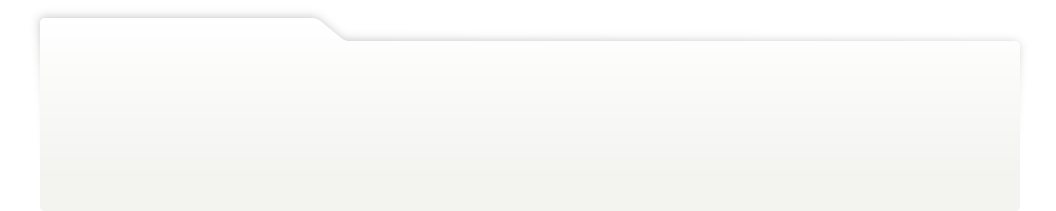
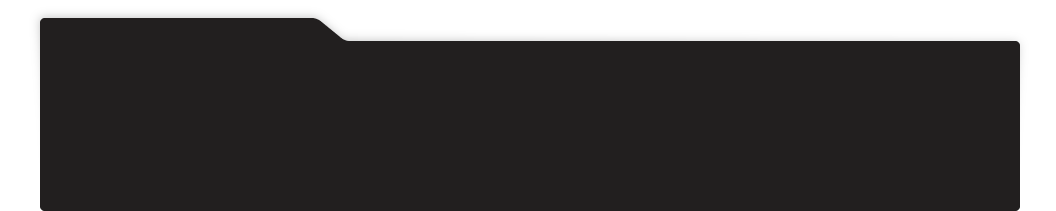
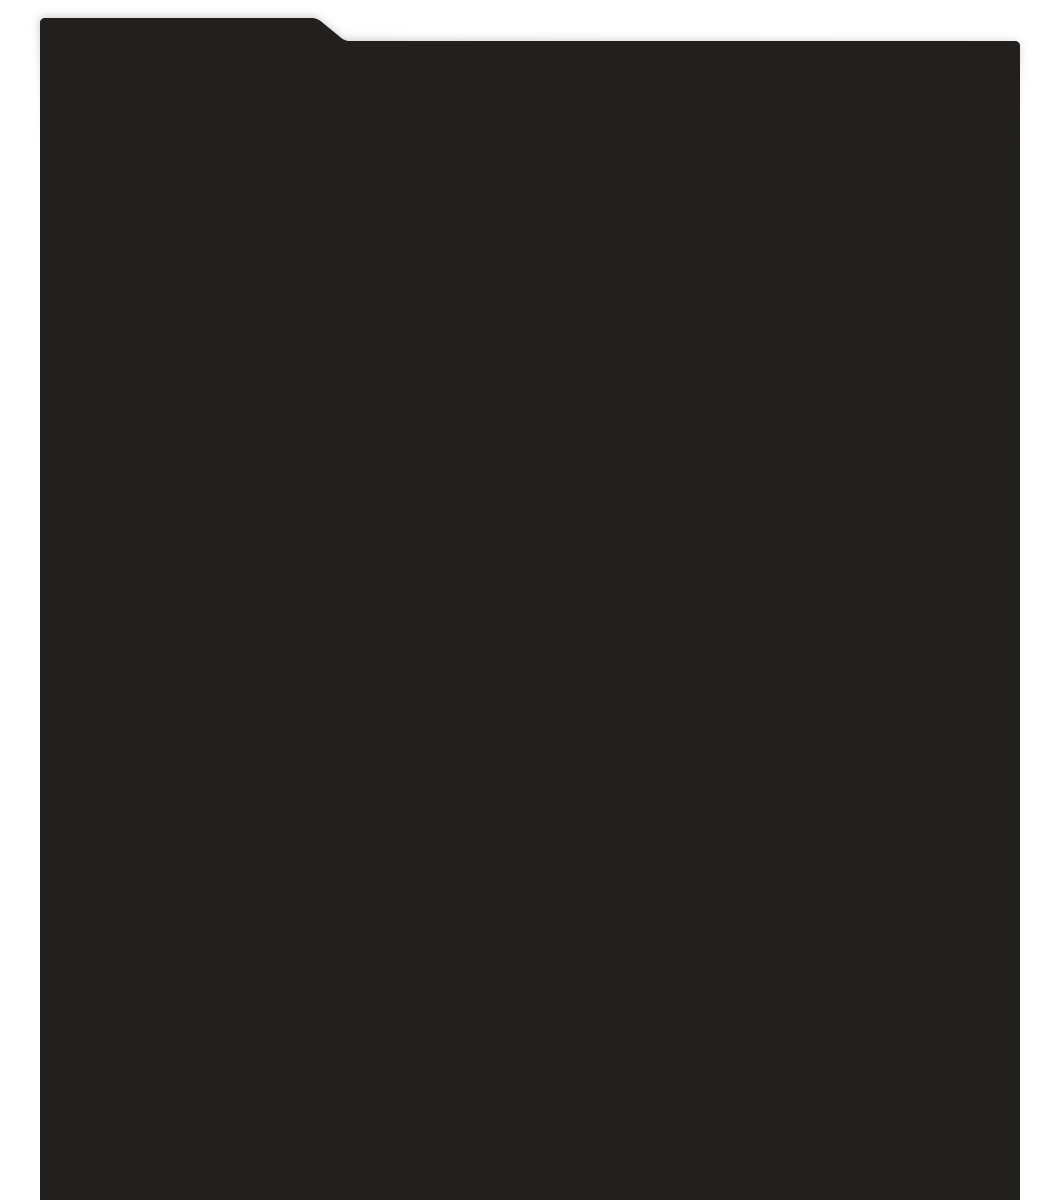
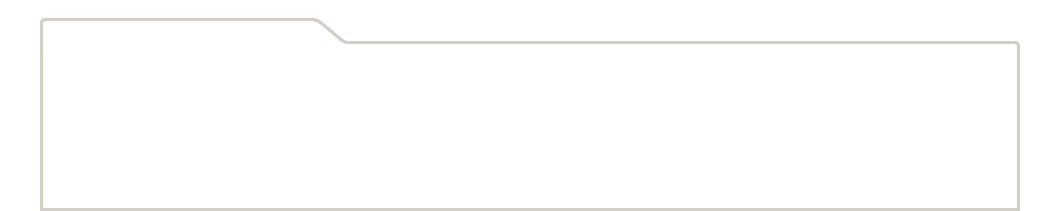
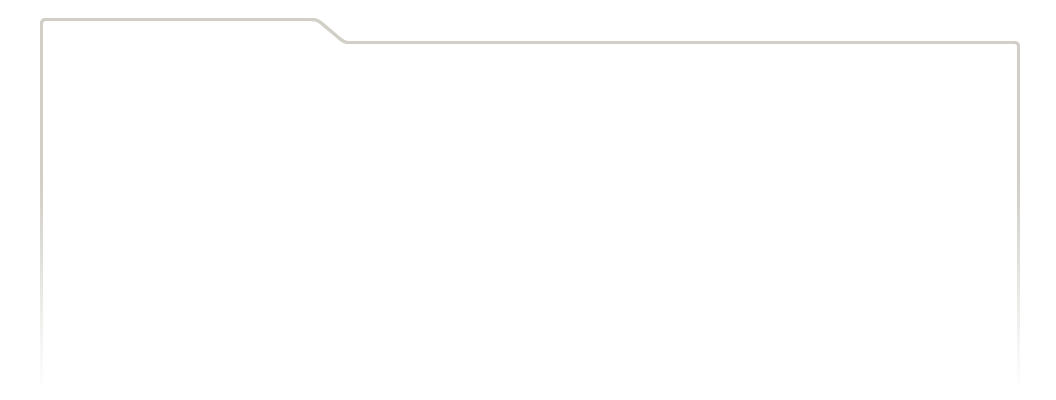
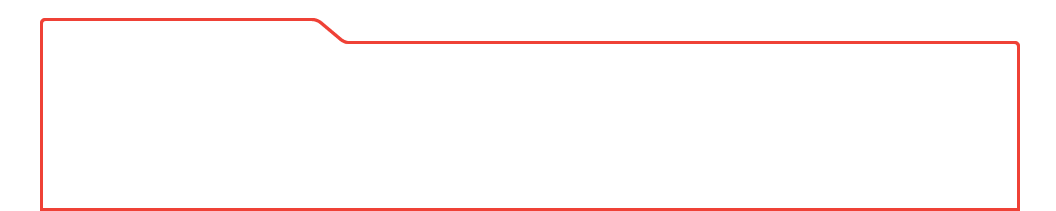
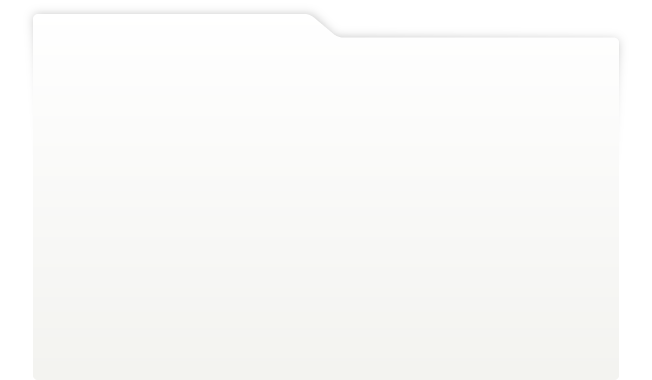
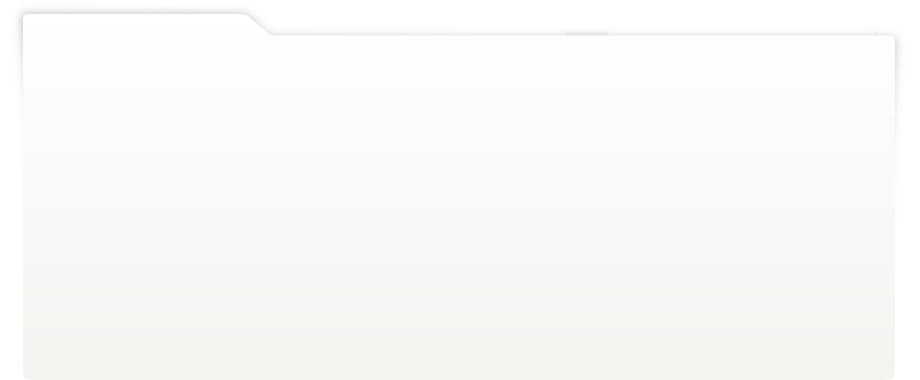
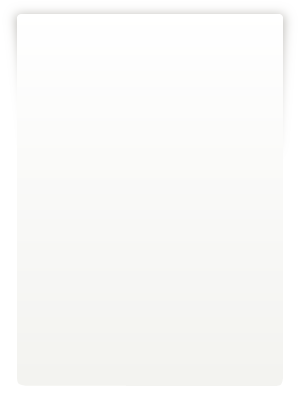
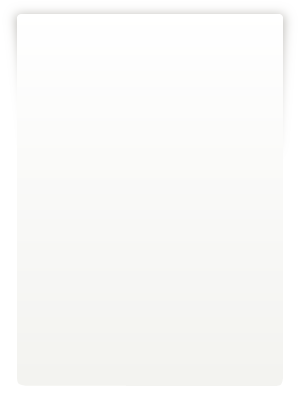
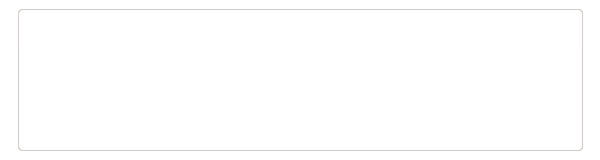
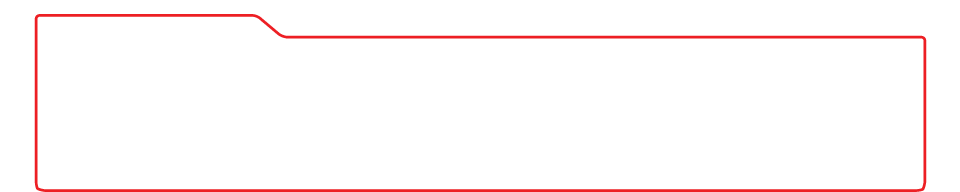
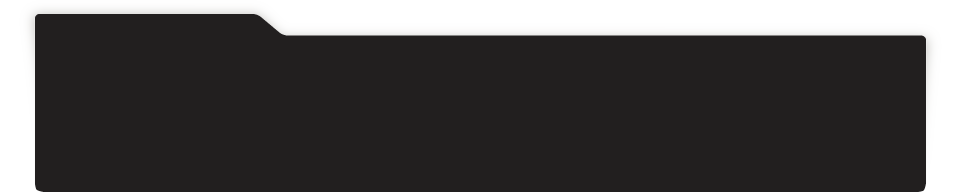
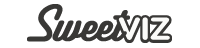
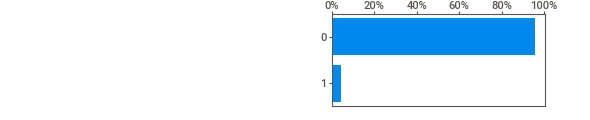
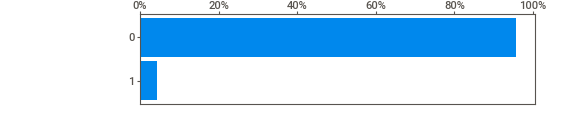
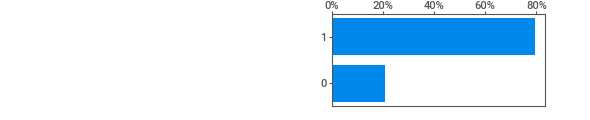
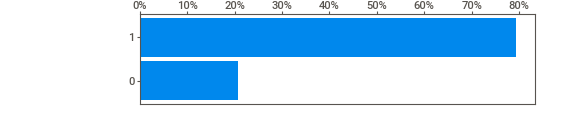
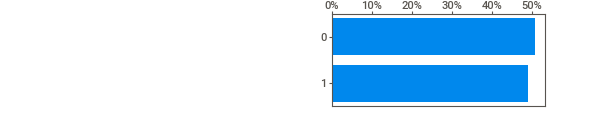
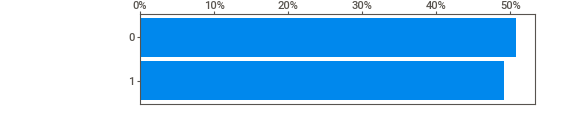
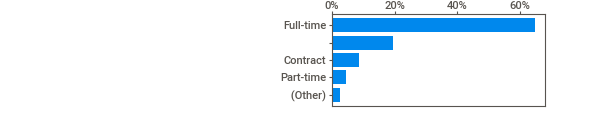
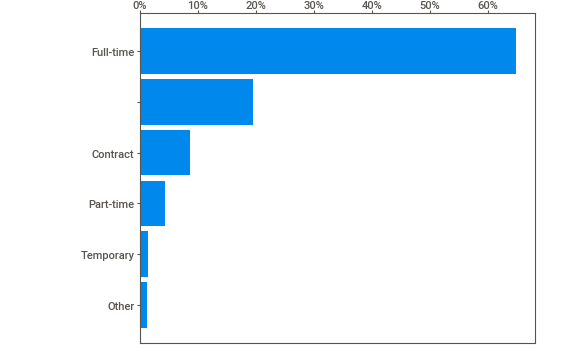
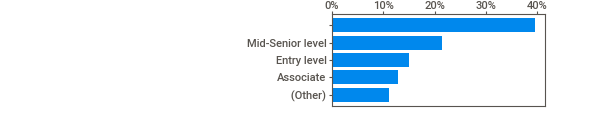
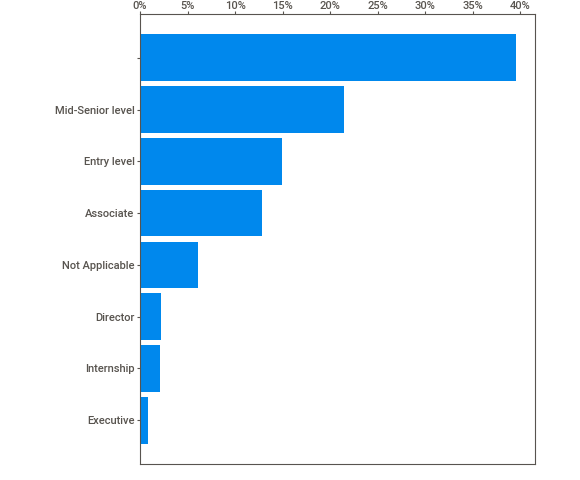
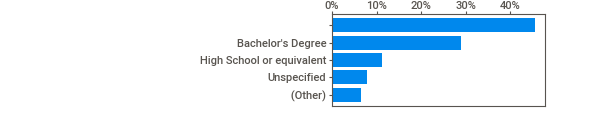
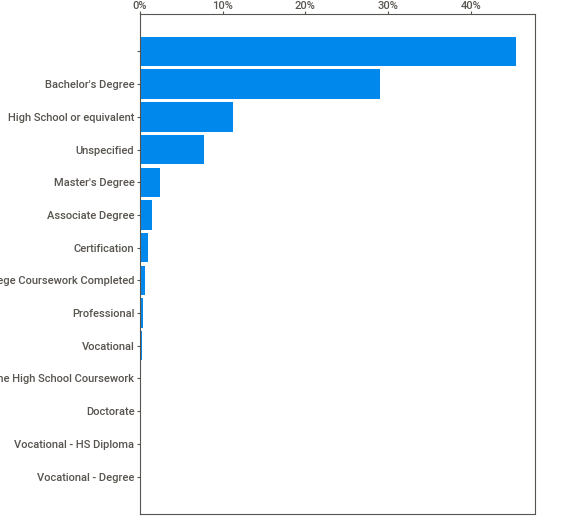
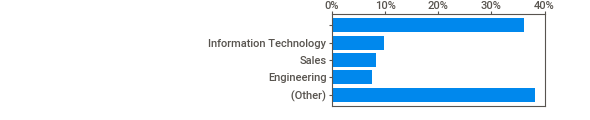
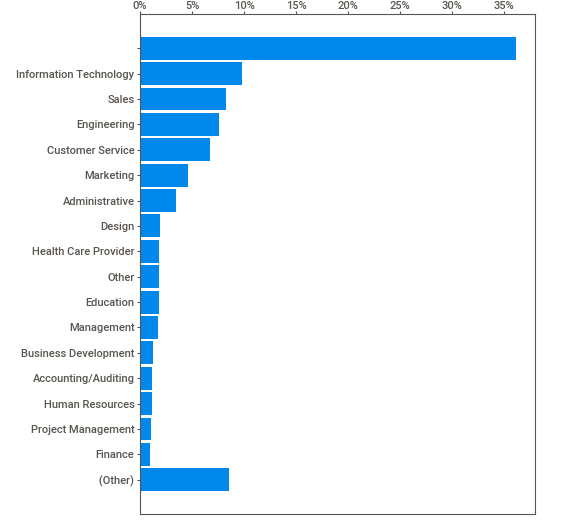
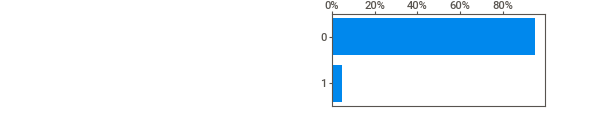
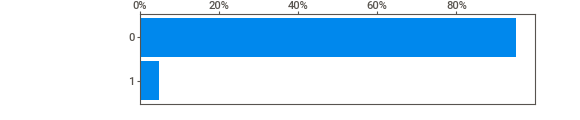
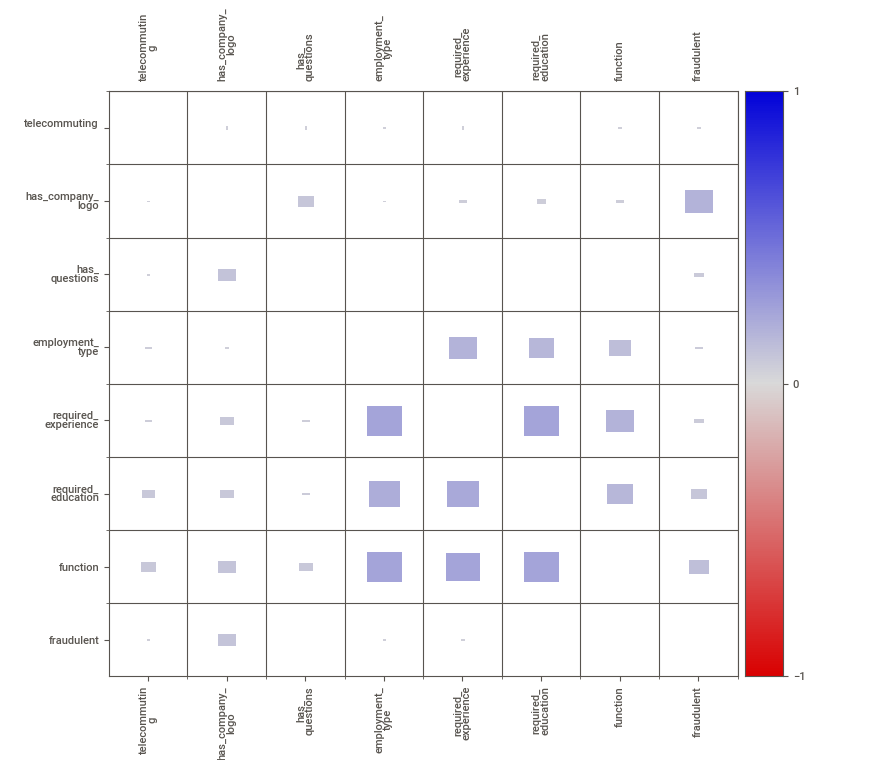
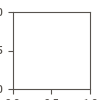

In [ ]:
with open('report.html', 'r') as f:
    html_content = f.read()

display(HTML(html_content))

Como primeras conclusiones del trabajo se puede observar que solo hay 856 publicaciones fraudulentas en un dataset de casi 18000 publicaciones. Es decir, el dataset esta desbalaceado. Notamos también que tiene una variedad importante de funciones, departamentos, locaciones, tipos de contrataciones.



---



**Tareas de NLP**

Paso todas las columnas de texto a minuscula

In [ ]:
df['company_profile'] = df['company_profile'].str.lower()
df['description'] = df['description'].str.lower()
df['requirements'] = df['requirements'].str.lower()
df['benefits'] = df['benefits'].str.lower()

Elimino los carácteres no deseados

In [ ]:
df['company_profile'] = df['company_profile'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)
df['description'] = df['description'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)
df['requirements'] = df['requirements'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)
df['benefits'] = df['benefits'].str.replace(r'[^a-záéíóúñü\s]', '', regex=True)

Tokenización

In [ ]:
df['tokens-1'] = df['company_profile'].apply(word_tokenize)
df['tokens-2'] = df['description'].apply(word_tokenize)
df['tokens-3'] = df["requirements"].apply(word_tokenize)
df['tokens-4'] = df["benefits"].apply(word_tokenize)

df[['company_profile','description','tokens-1','tokens-2']].head()

,company_profile,description,tokens-1,tokens-2
0,were food and weve created a groundbreaking an...,food a fastgrowing james beard awardwinning on...,"[were, food, and, weve, created, a, groundbrea...","[food, a, fastgrowing, james, beard, awardwinn..."
1,seconds the worlds cloud video production ser...,organised focused vibrant awesomedo you hav...,"[seconds, the, worlds, cloud, video, productio...","[organised, focused, vibrant, awesomedo, you, ..."
2,valor services provides workforce solutions th...,our client located in houston is actively seek...,"[valor, services, provides, workforce, solutio...","[our, client, located, in, houston, is, active..."
3,our passion for improving quality of life thro...,the company esri environmental systems resear...,"[our, passion, for, improving, quality, of, li...","[the, company, esri, environmental, systems, r..."
4,spotsource solutions llc is a global human cap...,job title itemization review managerlocation f...,"[spotsource, solutions, llc, is, a, global, hu...","[job, title, itemization, review, managerlocat..."


Llamo a las stopwords del vocabulario en ingles

In [ ]:
stop_words = set(stopwords.words('english'))

Elimino las stopwords

In [ ]:
df['tokens_sin_stopwords-1'] = df['tokens-1'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokens_sin_stopwords-2'] = df['tokens-2'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokens_sin_stopwords-3'] = df['tokens-3'].apply(lambda x: [word for word in x if word not in stop_words])
df['tokens_sin_stopwords-4'] = df['tokens-4'].apply(lambda x: [word for word in x if word not in stop_words])

df[['tokens-1', 'tokens_sin_stopwords-1']].head()


,tokens-1,tokens_sin_stopwords-1
0,"[were, food, and, weve, created, a, groundbrea...","[food, weve, created, groundbreaking, awardwin..."
1,"[seconds, the, worlds, cloud, video, productio...","[seconds, worlds, cloud, video, production, se..."
2,"[valor, services, provides, workforce, solutio...","[valor, services, provides, workforce, solutio..."
3,"[our, passion, for, improving, quality, of, li...","[passion, improving, quality, life, geography,..."
4,"[spotsource, solutions, llc, is, a, global, hu...","[spotsource, solutions, llc, global, human, ca..."


Lematizo

In [ ]:
nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(' '.join(text))
    return [token.lemma_ for token in doc]

df['lemmas-1'] = df['tokens_sin_stopwords-1'].apply(lemmatize_text)
df['lemmas-2'] = df['tokens_sin_stopwords-2'].apply(lemmatize_text)
df['lemmas-3'] = df['tokens_sin_stopwords-3'].apply(lemmatize_text)
df['lemmas-4'] = df['tokens_sin_stopwords-4'].apply(lemmatize_text)


df[['tokens_sin_stopwords-2', 'lemmas-2']].head()

,tokens_sin_stopwords-2,lemmas-2
0,"[food, fastgrowing, james, beard, awardwinning...","[food, fastgrowe, james, beard, awardwinne, on..."
1,"[organised, focused, vibrant, awesomedo, passi...","[organise, focused, vibrant, awesomedo, passio..."
2,"[client, located, houston, actively, seeking, ...","[client, locate, houston, actively, seek, expe..."
3,"[company, esri, environmental, systems, resear...","[company, esri, environmental, system, researc..."
4,"[job, title, itemization, review, managerlocat...","[job, title, itemization, review, managerlocat..."


In [ ]:
df['lemmas-1'] = df['lemmas-1'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['lemmas-2'] = df['lemmas-2'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['lemmas-3'] = df['lemmas-3'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
df['lemmas-4'] = df['lemmas-4'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

Aplico un análisis de sentimientos a los textos.

In [ ]:
sia = SentimentIntensityAnalyzer()
def sentiment_analysis(text):
    sentiment = sia.polarity_scores(text)
    return sentiment['compound']

In [ ]:
df['sentiment_profile'] = df['lemmas-1'].apply(sentiment_analysis)
df['sentiment_description'] = df['lemmas-2'].apply(sentiment_analysis)
df['sentiment_requirements'] = df['lemmas-3'].apply(sentiment_analysis)
df['sentiment_benefits'] = df['lemmas-4'].apply(sentiment_analysis)
df[["lemmas-1","lemmas-2","lemmas-3","lemmas-4"]]

,lemmas-1,lemmas-2,lemmas-3,lemmas-4
0,food we ve create groundbreaking awardwinne co...,food fastgrowe james beard awardwinne online f...,experience content management system major plu...,
1,second world cloud video production service se...,organise focused vibrant awesomedo passion cus...,expect youyour key responsibility communicate ...,get usthrough part second team gainexperience ...
2,valor service provide workforce solution meet ...,client locate houston actively seek experience...,implement precommissioning commission procedur...,
3,passion improve quality life geography heart e...,company esri environmental system research ins...,education bachelors masters gis business admin...,culture anything corporatewe collaborative cre...
4,spotsource solution llc global human capital m...,job title itemization review managerlocation f...,qualificationsrn license state texasdiploma ba...,full benefit offer
...,...,...,...,...
17875,vend look awesome new talent come join we you ...,case first time you ve visit website vend awar...,ace role youwill eat comprehensive statement w...,expect uswe open culture openly share result i...
17876,weblinc ecommerce platform service provider fa...,payroll accountant focus primarily payroll fun...,ba bs accounting desire fun love genuine passi...,health amp wellnessmedical planprescription dr...
17877,provide full time permanent position many medi...,experience project cost control staff engineer...,least year professional experienceability work...,
17878,,nemsia studio look experienced visualgraphic d...,must fluent late version corel amp adobe cc es...,competitive salary compensation base experienc...


In [ ]:
df[["sentiment_profile","sentiment_description","sentiment_requirements","sentiment_benefits"]]

,sentiment_profile,sentiment_description,sentiment_requirements,sentiment_benefits
0,0.9761,0.7184,0.8885,0.0000
1,0.9349,0.9948,0.9918,0.9716
2,0.9726,0.9509,0.9260,0.0000
3,0.9595,0.9956,0.9869,0.8555
4,0.9908,0.9313,0.0258,0.4588
...,...,...,...,...
17875,0.9973,0.9926,0.9933,0.9886
17876,0.9818,0.9590,0.9756,-0.0859
17877,0.4019,0.9766,0.4019,0.0000
17878,0.0000,0.9100,0.9136,0.9623


Creo dummies para variables categóricas

In [ ]:
categorical_columns = ['employment_type','industry',"function","required_experience","required_education"]

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

Elimino las columnas que no usaré para el análisis (Title no la uso porque con "function" debería alcanzar que describe de manera mas general el trabajo y no tiene tantos valores distintos (Notar que title tiene 11231 valores distintos). Se asume que el salario, el departamento y la ubicación no tienen efecto en que la publicación sea o no fraudulenta - notar que también tienen numerosos valores distintos, con lo cual es muy dificil tomar conclusiones frente a dicha diversidad de valores).

In [ ]:
X = df_encoded.drop(columns=["title","location","salary_range", "company_profile",
                              "description", "requirements", "benefits","department",
                             "fraudulent","tokens-1","tokens-2","tokens-3","tokens-4","lemmas-1","lemmas-2",
                              "lemmas-3","lemmas-4","tokens_sin_stopwords-1","tokens_sin_stopwords-2",
                             "tokens_sin_stopwords-3","tokens_sin_stopwords-4"
                              ])
y = df_encoded['fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X

,telecommuting,has_company_logo,has_questions,sentiment_profile,sentiment_description,sentiment_requirements,sentiment_benefits,employment_type_Contract,employment_type_Full-time,employment_type_Other,...,required_education_Doctorate,required_education_High School or equivalent,required_education_Master's Degree,required_education_Professional,required_education_Some College Coursework Completed,required_education_Some High School Coursework,required_education_Unspecified,required_education_Vocational,required_education_Vocational - Degree,required_education_Vocational - HS Diploma
0,0,1,0,0.9761,0.7184,0.8885,0.0000,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,1,0,0.9349,0.9948,0.9918,0.9716,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,0,0.9726,0.9509,0.9260,0.0000,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,0,0.9595,0.9956,0.9869,0.8555,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,0,1,1,0.9908,0.9313,0.0258,0.4588,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0.9973,0.9926,0.9933,0.9886,False,True,False,...,False,False,False,False,False,False,False,False,False,False
17876,0,1,1,0.9818,0.9590,0.9756,-0.0859,False,True,False,...,False,False,False,False,False,False,False,False,False,False
17877,0,0,0,0.4019,0.9766,0.4019,0.0000,False,True,False,...,False,False,False,False,False,False,False,False,False,False
17878,0,0,1,0.0000,0.9100,0.9136,0.9623,True,False,False,...,False,False,False,True,False,False,False,False,False,False




---



**Modelo: Regresión Logistica**

Aplico un modelo de regresión logística balanceado ya que la cantidad de publicaciones de empleo fraudulenta son mucho menores a las no fraudulentas

In [ ]:
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8227272727272728
              precision    recall  f1-score   support

           0       0.99      0.82      0.90      3331
           1       0.21      0.85      0.34       189

    accuracy                           0.82      3520
   macro avg       0.60      0.83      0.62      3520
weighted avg       0.95      0.82      0.87      3520



In [ ]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=['No fraudulenta', 'Fraudulenta'], columns=['Predicción No fraudulenta', 'Predicción Fraudulenta'])

fig = px.imshow(cm_df,
                text_auto=True,
                color_continuous_scale='Blues',
                title='Matriz de Confusión',
                labels=dict(x="Predicción", y="Verdadero", color="Cantidad"),
                x=cm_df.columns,
                y=cm_df.index)


fig.show()

Los resultados muestran que el modelo tiene una buena precisión para determinar publicaciones fraudulentas ya que de 189 publicaciones fraudulentas, 160 fueron determinadas correctamente.

Sin embargo, notar que también ha determinado que 595 de las publicaciones "no fraudulentas" como fraudulentas. Si bien en este caso los falsos positivos no son preocupantes, el modelo necesita un mayor desarrollo para mejorar su predicción. Esto se podría lograr incorporando nuevos dataset de entrenamiento, alguna variación en el preprocesamiento de NLP, etc.

Debido al desbalanceo del modelo también hay que tener cuidado con los resultados ya que puede terminar en un overfitting. Es probable que para mejorar los resultados del modelo sea necesario un dataset con muchas mas ofertas de empleo fraudulentas.




---



**Importancia de análsis de sentimientos**

En base a las importancias de cada columna analizada del dataset, se observa la importancia de las columnas relacionadas con el análisis de sentimientos.

El siguiente gráfico muestra la importancia de las 40 columnas más importantes. Notar que ninguna coincide con las de análsis de sentimientos.

In [ ]:
coefficients = model.coef_[0]
features = X_train.columns

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': coefficients})

coef_df['Absolute_Coefficient'] = coef_df['Coefficient'].abs()
top_features = coef_df.nlargest(10, 'Absolute_Coefficient')

fig = px.bar(top_features.sort_values(by='Absolute_Coefficient', ascending=False),
             x='Absolute_Coefficient',
             y='Feature',
             title='Top 10 Características Más Importantes en el Modelo de Regresión Logística',
             labels={'Absolute_Coefficient': 'Valor Absoluto del Coeficiente', 'Feature': 'Características'},
             orientation='h')


fig.show()

A continuación se muestran los coeficinetes de las columnas de análisis de sentimientos. Notar que la importancia de las mismas es muy inferior a las relacionadas con el tipo de industria y función. El análisis de sentimientos con más importancia corresponde con la descripción del perfil de la empresa.  

In [ ]:
columns_of_interest = ['sentiment_description', 'sentiment_requirements', 'sentiment_benefits','sentiment_profile']
specific_coefs = coef_df[coef_df['Feature'].isin(columns_of_interest)]
print(specific_coefs)

                  Feature  Coefficient  Absolute_Coefficient
3       sentiment_profile    -1.465532              1.465532
4   sentiment_description    -0.355408              0.355408
5  sentiment_requirements    -0.011757              0.011757
6      sentiment_benefits     0.646090              0.646090




---



**Conclusión**

Se concluye de este trabajo que se pudo crear un modelo aceptable que predice si una oferta de empleo es fraudulenta o no. Si bien el modelo no es el más preciso, acierta gran parte de las ofertas fraudulentas y puede llegar a ser un primer filtro a la hora de analizar ofertas.

También se pudieron realizar tareas de NLP para preprocesar las columnas de texto y luego realizarles un análisis de sentimientos que permita incluir dicho resultado en el modelo de regresión logística.